<h1 style="color:#023e8a;">Project Overview and dataset</h1>
<p style="font-weight: bold; font-size:18px; color:#219ebc;">Pima Indians Diabetes Database, You can view and download the dataset from <a href = https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database> Hotel </a></p>

<h2 style="color:#023e8a;">Reading dataset</h2>

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<h3 style="color:#023e8a;">Data type</h3>

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<h3 style="color:#023e8a;">The Numbers of samples and features</h3>

In [6]:
num_samples = data.shape[0] 
num_features = data.shape[1]

print(f'Number of samples : {num_samples}')
print(f'Number of features : {num_features}')

Number of samples : 768
Number of features : 9


<h3 style="color:#023e8a;">Missing values</h3>

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3 style="color:#023e8a;">Splitting dataset to input and output</h3>

In [8]:
data_input = data.drop(columns=['Outcome'])
data_output = data['Outcome']

<h3 style="color:#023e8a;">Splitting dataset into Training, Validation and Testing</h3>

In [9]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test =  train_test_split(
    data_input,
    data_output,
    test_size=0.2,
    random_state=1
)

X_train, X_val, y_train, y_val =  train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=1
)

In [10]:
print(X_train.shape[0])
print(y_train.shape[0])
print()
print(X_val.shape[0])
print(y_val.shape[0])
print()
print(X_test.shape[0])
print(y_test.shape[0])

460
460

154
154

154
154


<h3 style="color:#023e8a;">Standard Scaler
</h3>

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_tarin_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

<h3 style="color:#023e8a;">Helper Function: Evaluate model</h3>

In [13]:
from sklearn.metrics import accuracy_score

def evaluate_model(clf, X_train,y_train, X_val ,y_val):
    clf.fit(X_train,y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    print(clf.__class__.__name__)
    print('Acc of training is: ',acc_train)
    print('Acc of validation is: ',acc_val)
    print('------------------------------')
    return acc_train, acc_val

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [15]:
tree_clf = DecisionTreeClassifier(random_state=1)
logistic_clf = LogisticRegression(random_state=1)
svc_clf = SVC(random_state=1)

In [16]:
estimators = [
    ('tree',tree_clf),
    ('logistic',logistic_clf),
    ('svc',svc_clf)
]
voting_clf = VotingClassifier(estimators)

In [17]:
all_estimators = estimators + [('voting clf',voting_clf)]

results = {
    'model':[],
    'acc train':[],
    'acc val':[]
}

for (name, clf) in all_estimators:
    acc_train, acc_val = evaluate_model(clf, X_tarin_scaled, y_train, X_val_scaled,y_val)
    results['model'].append(name)
    results['acc train'].append(acc_train)
    results['acc val'].append(acc_val)

DecisionTreeClassifier
Acc of training is:  1.0
Acc of validation is:  0.7272727272727273
------------------------------
LogisticRegression
Acc of training is:  0.7869565217391304
Acc of validation is:  0.7597402597402597
------------------------------
SVC
Acc of training is:  0.8347826086956521
Acc of validation is:  0.7467532467532467
------------------------------
VotingClassifier
Acc of training is:  0.8434782608695652
Acc of validation is:  0.7532467532467533
------------------------------


In [18]:
results

{'model': ['tree', 'logistic', 'svc', 'voting clf'],
 'acc train': [1.0,
  0.7869565217391304,
  0.8347826086956521,
  0.8434782608695652],
 'acc val': [0.7272727272727273,
  0.7597402597402597,
  0.7467532467532467,
  0.7532467532467533]}

In [19]:
results_df = pd.DataFrame(results)
results_df

,model,acc train,acc val
0,tree,1.000000,0.727273
1,logistic,0.786957,0.759740
2,svc,0.834783,0.746753
3,voting clf,0.843478,0.753247


In [20]:
results_df = pd.DataFrame(results)
results_df

,model,acc train,acc val
0,tree,1.000000,0.727273
1,logistic,0.786957,0.759740
2,svc,0.834783,0.746753
3,voting clf,0.843478,0.753247


<Axes: xlabel='model'>

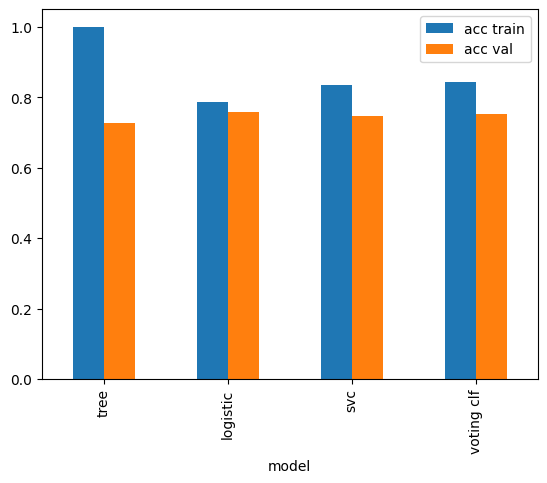

In [21]:
results_df.plot.bar(x= 'model' , y=['acc train','acc val'])

In [22]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
LogisticRegression(random_state=1), n_estimators=100, max_samples=0.75,
bootstrap=True, random_state=1,n_jobs=-1)
acc_train_bag, acc_val_bag = evaluate_model(bag_clf, X_tarin_scaled, y_train, X_val_scaled,y_val)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


BaggingClassifier
Acc of training is:  0.7869565217391304
Acc of validation is:  0.7597402597402597
------------------------------


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=1)
acc_train_rf, acc_val_rf = evaluate_model(rf_clf, X_tarin_scaled, y_train, X_val_scaled,y_val)

RandomForestClassifier
Acc of training is:  0.8239130434782609
Acc of validation is:  0.7337662337662337
------------------------------


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
ex_clf = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=1)
acc_train_ex, acc_val_ex = evaluate_model(ex_clf, X_tarin_scaled, y_train, X_val_scaled,y_val)

ExtraTreesClassifier
Acc of training is:  0.7913043478260869
Acc of validation is:  0.7467532467532467
------------------------------


In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(min_samples_leaf=50, max_depth=5, random_state=1),
    n_estimators=500,
    learning_rate=0.05,
    random_state=1
)
acc_train_ada, acc_val_ada = evaluate_model(ada_clf, X_tarin_scaled, y_train, X_val_scaled,y_val)

AdaBoostClassifier
Acc of training is:  0.9760869565217392
Acc of validation is:  0.7272727272727273
------------------------------


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbct_clf = GradientBoostingClassifier(max_depth=1, n_estimators=500, learning_rate=0.05, random_state=1)
acc_train_gbct, acc_val_gbct = evaluate_model(gbct_clf, X_tarin_scaled, y_train, X_val_scaled,y_val)

GradientBoostingClassifier
Acc of training is:  0.8239130434782609
Acc of validation is:  0.7467532467532467
------------------------------


In [27]:
all_results = {
'model': [],
'acc train': [],
'acc val': []
}

all_results['model'] = results['model'] + ['bagging', 'rf', 'ex', 'ada', 'gbct']
all_results['acc train'] = results['acc train'] + [acc_train_bag, acc_train_rf, acc_train_ex,acc_train_ada, acc_train_gbct]
all_results['acc val'] = results['acc val'] + [acc_val_bag, acc_val_rf, acc_val_ex, acc_val_ada, acc_val_gbct]


In [28]:
all_results_df = pd.DataFrame(all_results)
all_results_df.sort_values(by='acc val',ascending=False,ignore_index=True)

,model,acc train,acc val
0,logistic,0.786957,0.759740
1,bagging,0.786957,0.759740
2,voting clf,0.843478,0.753247
3,svc,0.834783,0.746753
4,ex,0.791304,0.746753
5,gbct,0.823913,0.746753
6,rf,0.823913,0.733766
7,tree,1.000000,0.727273
8,ada,0.976087,0.727273


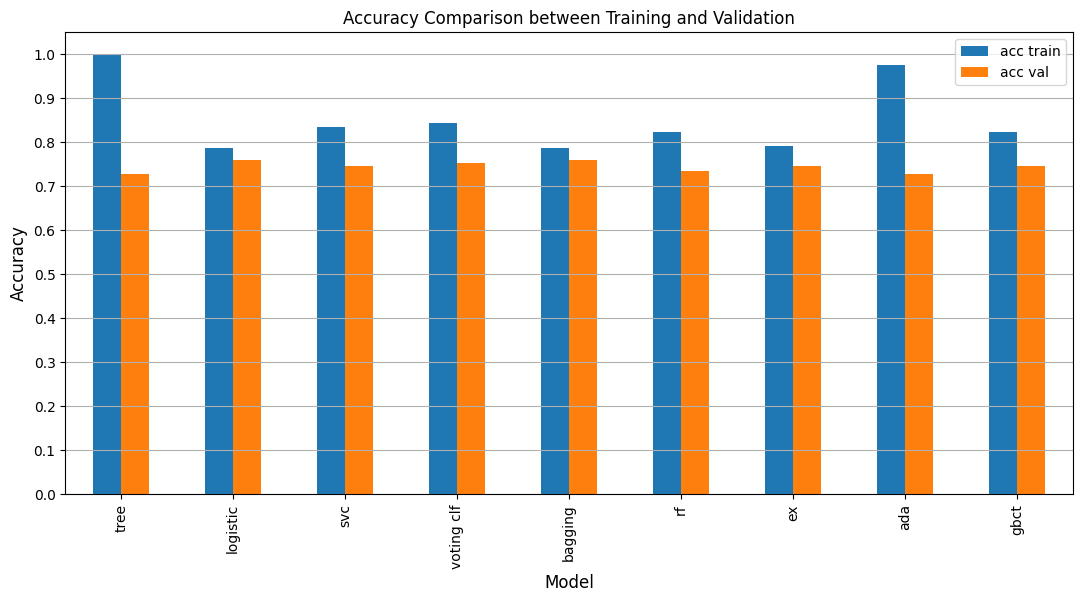

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ax = all_results_df.plot.bar(x='model', y=['acc train', 'acc val'], figsize=(13, 6))
ax.set_xlabel('Model', fontsize=12)  
ax.set_ylabel('Accuracy', fontsize=12) 
plt.title('Accuracy Comparison between Training and Validation')
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(axis='y')
plt.show()

In [30]:
model_best = BaggingClassifier(
LogisticRegression(random_state=1), n_estimators=100, max_samples = 0.75, bootstrap=True, random_state=1, n_jobs=-1
)
model_best.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [ ]:
y_pred_test = model_best.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_test) 

In [ ]:
import pickle
with open('saved-model.pickle', 'wb') as f: 
    pickle.dump(model_best, f)

with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
with open( 'saved-model.pickle', 'rb') as f:
    my_model = pickle.load(f)

with open('scaler.pickle', 'rb') as f:
    my_scaler = pickle.load(f)

In [ ]:
x = [6, 148, 72, 35, 10, 33.6, 0.627, 50]

In [ ]:
x=np.array(x).reshape(1,-1)

In [ ]:
x

In [ ]:
x_scaled = my_scaler.transform(x)

In [ ]:
x_scaled

In [ ]:
y= my_model.predict(x_scaled)

In [ ]:
y[0]